PROJETO 2 C.DADOS - Fernando Jun, Luca Krausz, Luiz Miguel e Vinicius Grecco.
O objetivo deste projeto é prever a média de matemática de uma escola no ENEM com base em 5 features, para isso, seguimos as seguintes etapas abaixo, e exemplificamos com um cenário hipotético de um fundo de investimentos da Faria Lima, melhor explicado mais abaxo:

In [4]:
%matplotlib inline
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from sklearn.model_selection import *
import numpy as np
import os
import unicodedata

In [5]:
# Para ter melhor print
from IPython.display import display

# Listando o diretório de trabalho. Lembre-se que o arquivo com a base de dados precisa estar neste diretório.
print('Esperamos trabalhar no diretório')

print(os.getcwd())

# Carregando os dados do arquivo
dados = pd.read_excel('MICRODADOS_ENEM_ESCOLA_2.xlsx', sheet_name = 'MICRODADOS_ENEM_ESCOLA')

# comando pra ele mostrar todas as colunas e printando tabela
pd.set_option('display.max_columns', None)

Esperamos trabalhar no diretório
c:\Users\aerac\Desktop\Anotações\Python\Cdados\Projeto 2A\Projeto-2---Cdados-Modelo-Preditivo\Projeto 2


Target = "NU_MEDIA_MT"

Feautures:\
"TP_DEPENDENCIA_ADM_ESCOLA"\
"NU_TAXA_PARTICIPACAO"\
"NU_TAXA_ABANDONO"\
"NU_TAXA_PARTICIPACAO"\
"PORTE_ESCOLA"

In [6]:
dados.head(10)

,NU_ANO,CO_UF_ESCOLA,SG_UF_ESCOLA,CO_MUNICIPIO_ESCOLA,NO_MUNICIPIO_ESCOLA,CO_ESCOLA_EDUCACENSO,NO_ESCOLA_EDUCACENSO,TP_DEPENDENCIA_ADM_ESCOLA,TP_LOCALIZACAO_ESCOLA,NU_MATRICULAS,NU_PARTICIPANTES_NEC_ESP,NU_PARTICIPANTES,NU_TAXA_PARTICIPACAO,NU_MEDIA_CN,NU_MEDIA_CH,NU_MEDIA_LP,NU_MEDIA_MT,NU_MEDIA_RED,NU_MEDIA_OBJ,NU_MEDIA_TOT,INSE,PC_FORMACAO_DOCENTE,NU_TAXA_PERMANENCIA,NU_TAXA_APROVACAO,NU_TAXA_REPROVACAO,NU_TAXA_ABANDONO,PORTE_ESCOLA
0,2007,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,144,NaN,140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.03,NaN,NaN,NaN,91.9,8.1,0.0,Maior que 90 alunos
1,2006,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,184,NaN,139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.82,NaN,NaN,NaN,NaN,NaN,NaN,Maior que 90 alunos
2,2005,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,220,NaN,145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.83,NaN,NaN,NaN,86.5,12.4,1.1,Maior que 90 alunos
3,2008,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,186,NaN,171,NaN,NaN,NaN,NaN,NaN,72.16,60.02,NaN,NaN,NaN,NaN,90.3,9.7,0.0,Maior que 90 alunos
4,2007,11,RO,1100205,Porto Velho,11000171,CENTRO EDUCACIONAL MOJUCA,4,1,19,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.84,NaN,NaN,NaN,74.2,21.0,4.8,De 1 a 30 alunos
5,2008,11,RO,1100205,Porto Velho,11000171,CENTRO EDUCACIONAL MOJUCA,4,1,33,NaN,13,NaN,NaN,NaN,NaN,NaN,59.81,42.49,NaN,NaN,NaN,NaN,79.1,17.9,3.0,De 31 a 60 alunos
6,2005,11,RO,1100205,Porto Velho,11000171,CENTRO EDUCACIONAL MOJUCA,4,1,25,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.44,NaN,NaN,NaN,69.3,25.0,5.7,De 1 a 30 alunos
7,2005,11,RO,1100205,Porto Velho,11000180,INTERATIVO CURSOS E COLEGIO,4,1,87,NaN,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.46,NaN,NaN,NaN,86.5,13.5,0.0,De 61 a 90 alunos
8,2006,11,RO,1100205,Porto Velho,11000180,INTERATIVO CURSOS E COLEGIO,4,1,82,NaN,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.73,NaN,NaN,NaN,NaN,NaN,NaN,De 61 a 90 alunos
9,2008,11,RO,1100205,Porto Velho,11000180,INTERAÇÃO - CURSOS E COLÉGIO,4,1,31,NaN,11,NaN,NaN,NaN,NaN,NaN,59.55,45.60,NaN,NaN,NaN,NaN,90.8,9.2,0.0,De 31 a 60 alunos


In [7]:
# Fomatação

pd_dados = pd.DataFrame(dados)

dados_2009 = pd_dados.loc[pd_dados['NU_ANO'] == 2009]

dados_feito = dados_2009[['NU_MEDIA_MT', 'TP_DEPENDENCIA_ADM_ESCOLA', 'NU_TAXA_PARTICIPACAO', 'NU_TAXA_ABANDONO', 'NU_TAXA_APROVACAO', 'PORTE_ESCOLA']]

dados_feito = dados_feito.dropna()

dados_feito = dados_feito.reset_index()

dados_feito = dados_feito.drop(columns = ['index'])

In [8]:
dados_feito.head(5)

,NU_MEDIA_MT,TP_DEPENDENCIA_ADM_ESCOLA,NU_TAXA_PARTICIPACAO,NU_TAXA_ABANDONO,NU_TAXA_APROVACAO,PORTE_ESCOLA
0,592.42,4,65.5,0.0,95.5,Maior que 90 alunos
1,467.55,4,50.0,4.7,89.7,De 1 a 30 alunos
2,551.71,4,77.1,0.0,96.3,De 61 a 90 alunos
3,498.91,4,52.2,1.3,91.7,De 61 a 90 alunos
4,570.26,4,60.0,2.3,93.2,De 1 a 30 alunos


In [9]:
dados_feito.isnull().sum()

NU_MEDIA_MT                  0
TP_DEPENDENCIA_ADM_ESCOLA    0
NU_TAXA_PARTICIPACAO         0
NU_TAXA_ABANDONO             0
NU_TAXA_APROVACAO            0
PORTE_ESCOLA                 0
dtype: int64

In [10]:
dados_feito.shape

(17848, 6)

In [11]:
#dados_feito.NU_MEDIA_MT

dados_feito.NU_MEDIA_MT.head()

0    592.42
1    467.55
2    551.71
3    498.91
4    570.26
Name: NU_MEDIA_MT, dtype: float64

# **Análise Exploratória!**

## Gráficos de cruzamento entre o Target (NU_MEDIA_MT) e as Features:


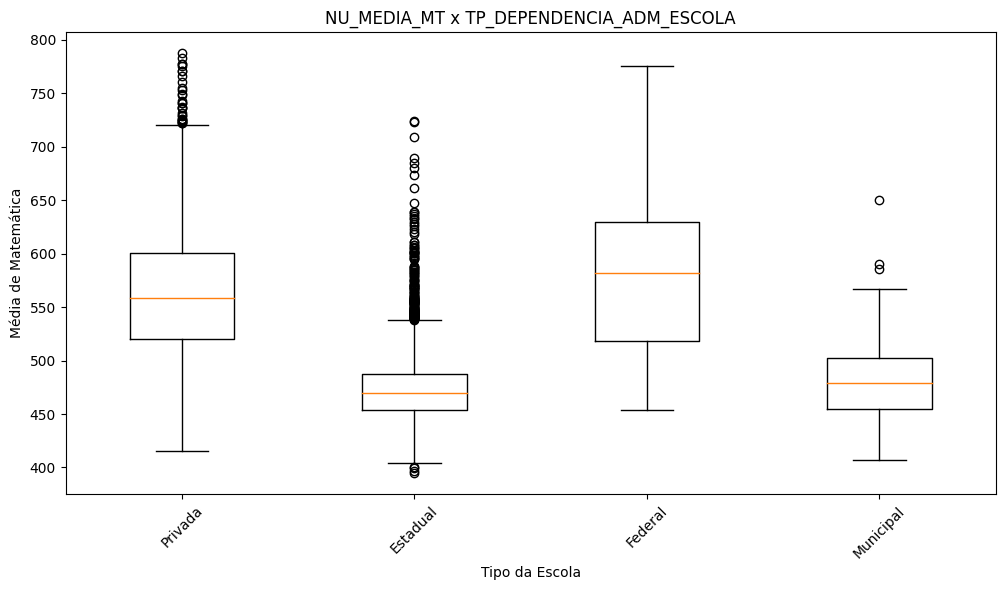

In [12]:
#   NU_MEDIA_MT x TP_DEPENDENCIA_ADM_ESCOLA

plt.figure(figsize=(12, 6))

tipos_escola = {1: 'Federal', 2: 'Estadual', 3: 'Municipal', 4: 'Privada'}

# Extraindo as categorias
porte_escola_categories = dados_feito['TP_DEPENDENCIA_ADM_ESCOLA'].unique()

boxplot_data = [dados_feito[dados_feito['TP_DEPENDENCIA_ADM_ESCOLA'] == category]['NU_MEDIA_MT'] for category in porte_escola_categories]
labels = [tipos_escola[category] for category in porte_escola_categories]

plt.boxplot(boxplot_data, labels=labels)

plt.title('NU_MEDIA_MT x TP_DEPENDENCIA_ADM_ESCOLA')
plt.xlabel('Tipo da Escola')
plt.ylabel('Média de Matemática')
plt.xticks(rotation=45)
plt.show()

#### EXPLICAÇÃO:

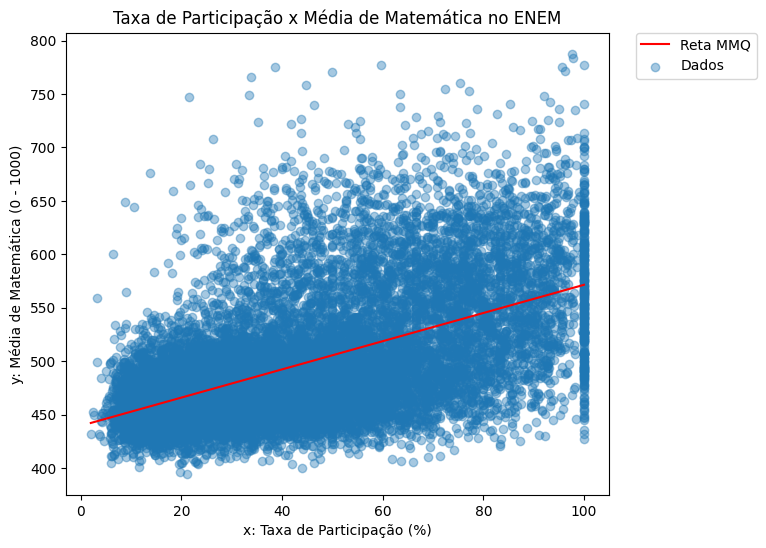

In [13]:
#       NU_MEDIA_MT x NU_TAXA_PARTICIPACAO

#   Método dos mínimos quadrados

# Definindo B1 e B0:

x_dados = dados_feito['NU_TAXA_PARTICIPACAO']
y_dados = dados_feito['NU_MEDIA_MT']

Xb = dados_feito['NU_TAXA_PARTICIPACAO'].mean()
Yb = dados_feito['NU_MEDIA_MT'].mean()

Sxy = 0
for i in range(len(dados_feito)):
    Sxy += (dados_feito['NU_TAXA_PARTICIPACAO'][i]-Xb)*(dados_feito['NU_MEDIA_MT'][i]-Yb)

Sxx = 0
for i in range(len(dados_feito)):
   Sxx += (dados_feito['NU_TAXA_PARTICIPACAO'][i]-Xb)**2

b1 = Sxy/Sxx
b0 = Yb - b1*Xb

# Definindo os vetores x_vec e y_vec:

x_vec = np.linspace(dados_feito['NU_TAXA_PARTICIPACAO'].min(), dados_feito['NU_TAXA_PARTICIPACAO'].max(), 100)
y_vec = b0 + b1*x_vec

# Plotando o gráfico:
plt.figure(figsize=(7,6))
plt.plot(x_vec,y_vec, color="r") # resultados da regressão
plt.scatter(x_dados, y_dados, alpha=0.4); # dados
plt.xlabel("x: Taxa de Participação (%)")
plt.ylabel("y: Média de Matemática (0 - 1000)")
plt.legend(('Reta MMQ','Dados'), bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.title('Taxa de Participação x Média de Matemática no ENEM')
plt.show()

#### EXPLICAÇÃO:

(Apagar isso dps, esse gráfico não está levando em considerção o tipo da escola, somente a média em sua forma mais pura.)

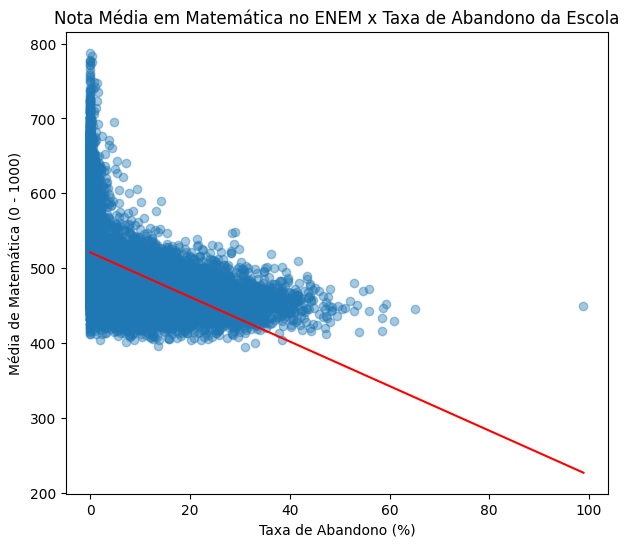

In [14]:
#   NU_MEDIA_MT x NU_TAXA_ABANDONO

#   Método dos mínimos quadrados

# Definindo B1 e B0:

x_dados = dados_feito['NU_TAXA_ABANDONO']
y_dados = dados_feito['NU_MEDIA_MT']

Xb = dados_feito['NU_TAXA_ABANDONO'].mean()
Yb = dados_feito['NU_MEDIA_MT'].mean()

Sxy = 0
for i in range(len(dados_feito)):
    Sxy += (dados_feito['NU_TAXA_ABANDONO'][i]-Xb)*(dados_feito['NU_MEDIA_MT'][i]-Yb)

Sxx = 0
for i in range(len(dados_feito)):
   Sxx += (dados_feito['NU_TAXA_ABANDONO'][i]-Xb)**2

b1 = Sxy/Sxx
b0 = Yb - b1*Xb

# Definindo os vetores x_vec e y_vec:

x_vec = np.linspace(dados_feito['NU_TAXA_ABANDONO'].min(), dados_feito['NU_TAXA_ABANDONO'].max(), 100)
y_vec = b0 + b1*x_vec

# Plotando o gráfico:

plt.figure(figsize=(7,6))
plt.plot(x_vec,y_vec, color="r") # resultados da regressão
plt.scatter(x_dados, y_dados, alpha=0.4); # dados
plt.xlabel("Taxa de Abandono (%)")
plt.ylabel("Média de Matemática (0 - 1000)")
plt.title('Nota Média em Matemática no ENEM x Taxa de Abandono da Escola')
plt.show()


#### EXPLICAÇÃO: 
Podemos observar neste gráfico que é inversamente proporcional a relação entre a taxa de abandono de escola e a nota deste mesmo aluno. Desta maneira, quanto menor a taxa de abandono, maior a nota do ENEM.

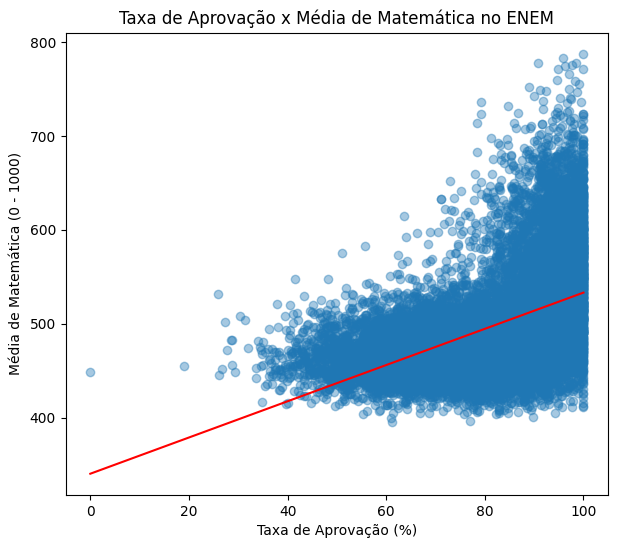

In [15]:
#   NU_MEDIA_MT x NU_TAXA_APROVACAO

#   Método dos mínimos quadrados

# Definindo B1 e B0:

x_dados = dados_feito['NU_TAXA_APROVACAO']
y_dados = dados_feito['NU_MEDIA_MT']

Xb = dados_feito['NU_TAXA_APROVACAO'].mean()
Yb = dados_feito['NU_MEDIA_MT'].mean()

Sxy = 0
for i in range(len(dados_feito)):
    Sxy += (dados_feito['NU_TAXA_APROVACAO'][i]-Xb)*(dados_feito['NU_MEDIA_MT'][i]-Yb)

Sxx = 0
for i in range(len(dados_feito)):
   Sxx += (dados_feito['NU_TAXA_APROVACAO'][i]-Xb)**2

b1 = Sxy/Sxx
b0 = Yb - b1*Xb

# Definindo os vetores x_vec e y_vec:

x_vec = np.linspace(dados_feito['NU_TAXA_APROVACAO'].min(), dados_feito['NU_TAXA_APROVACAO'].max(), 100)
y_vec = b0 + b1*x_vec

# Plotando o gráfico:
plt.figure(figsize=(7,6))
plt.plot(x_vec,y_vec, color="r") # resultados da regressão
plt.scatter(x_dados, y_dados, alpha=0.4); # dados
plt.xlabel("Taxa de Aprovação (%)")
plt.ylabel("Média de Matemática (0 - 1000)")
plt.title('Taxa de Aprovação x Média de Matemática no ENEM')
plt.show()

#### EXPLICAÇÃO:

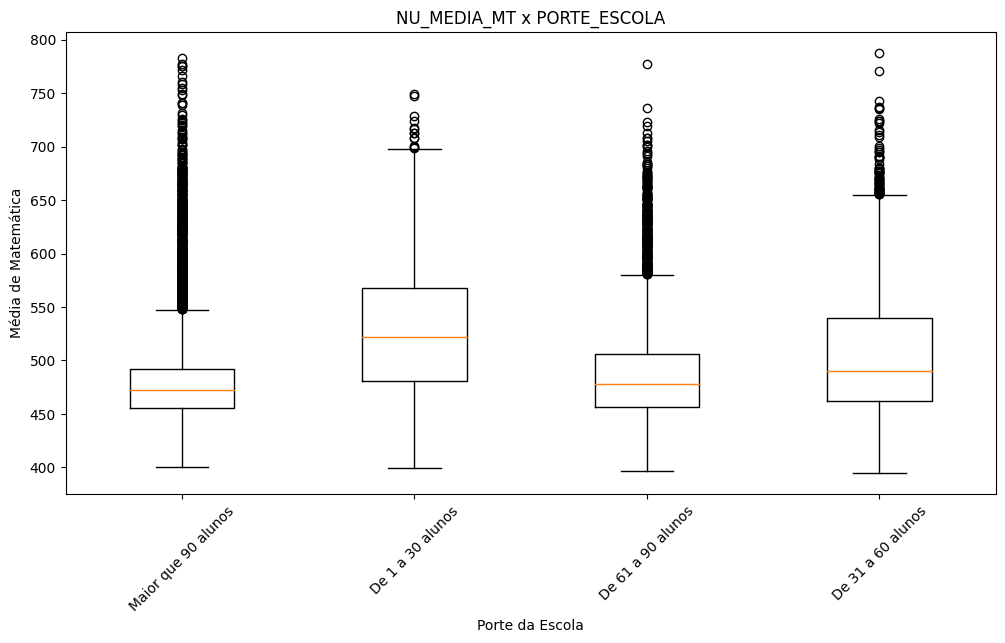

In [16]:
# NU_MEDIA_MT x PORTE_ESCOLA

plt.figure(figsize=(12, 6))

# Extraindo as categorias
porte_escola_categories = dados_feito['PORTE_ESCOLA'].unique()

boxplot_data = [dados_feito[dados_feito['PORTE_ESCOLA'] == category]['NU_MEDIA_MT'] for category in porte_escola_categories]

plt.boxplot(boxplot_data, labels=porte_escola_categories)

plt.title('NU_MEDIA_MT x PORTE_ESCOLA')
plt.xlabel('Porte da Escola')
plt.ylabel('Média de Matemática')
plt.xticks(rotation=45)
plt.show()

#### EXPLICAÇÃO:

Um fundo de investimentos da Faria Lima está querendo saber de onde vem os melhores prospectos (estudantes que estão ingressando agora na faculdade), para poder realizar campanhas e eventos em lugares onde esses prospectos estejam, para popularizar o banco e despertar a vontade desses prospectos de trabalharem lá futuramente. 
Para isso, o fundo de investimentos precisa de um código que preveja a média da nota de matemática da escola, com base em outras informações, para isso, eles analisarão algumas features:

A primeira a ser analisada foi a TP_DEPENDENCIA_ADM_ESCOLA, que nos diz se é uma escola particular, municipal, estadual ou federal. No gráfico plotado acima, observa-se que escolas estaduais possuem as piores médias de matematica, enquanto as particulares possuem os maiores valores decripantes. Enquanto isso, as federais surpreenderam com a maior mediana e os melhores quartis

A segunda feature escolhida foi a taxa de participação da escola no ENEM, no gráfico podemos observar que quanto maior a taxa de participação, maior a média de matemática no ENEM.

Já a terceira, diz respeito a taxa de abandono da escola, nela podemos observar que quanto maior a taxa de abandono, menor é a média de matemática do ENEM

Agora na quarta e penúltima feature, que condiz com a taxa de aprovação, é compreendido que quanto maior a taxa de aprovação, maior a média de matemática da escola no ENEM.

Ja na quinta e última feature, onde leva-se em conta o porte da escola, nota-se que os 25% piores de cada tipo chegam a ser bem similares, ja o segundo e terceiro quartil (que representa os acima dos 25% piores e abaixo dos 25% melhores) é maior em escolas de 1 a 30 alunos, e diminui a medida que aumenta o porte da escola. Porém as maiores notas vem das escolas com maior porte, 

# **Modelos de Predição**

### Separação da Base de dados 'Treino' e 'Teste' ###

In [18]:
X = pd.DataFrame(dados_feito[['TP_DEPENDENCIA_ADM_ESCOLA', 'NU_TAXA_PARTICIPACAO', 'NU_TAXA_ABANDONO', 'NU_TAXA_APROVACAO', 'PORTE_ESCOLA']])
y = pd.DataFrame(dados_feito['NU_MEDIA_MT'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Modelo da 'Random Tree'